# GSHS 600mm test

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [1]:
import importlib, sys, subprocess
packages = "numpy, pandas, matplotlib, scipy, astropy, ysfitsutilpy, ysphotutilpy, ysvisutilpy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        print(f"**** module {pkg} is not installed")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
    else: 
        print(f"**** module {pkg} is installed")

**** module numpy is installed
**** module pandas is installed
**** module matplotlib is installed
**** module scipy is installed
**** module astropy is installed
**** module ysfitsutilpy is installed
**** module ysphotutilpy is installed
**** module ysvisutilpy is installed
**** module photutils is installed
**** module ccdproc is installed
**** module version_information is installed


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

In [2]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2023-10-04 22:27:25 (KST = GMT+0900) 
0 Python     3.11.5 64bit [GCC 11.2.0]
1 IPython    8.15.0
2 OS         Linux 5.15.0 84 generic x86_64 with glibc2.31
3 numpy      1.26.0
4 pandas     2.0.3
5 matplotlib 3.7.2
6 scipy      1.11.1
7 astropy    5.2.1
8 ysfitsutilpy 0.2
9 ysphotutilpy 0.1.1
10 ysvisutilpy 0.1.dev0
11 photutils  1.6.0
12 ccdproc    2.4.0
13 version_information 1.0.4


### import modules

In [3]:
import os
from glob import glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import ysfitsutilpy as yfu
import ysphotutilpy as ypu
import ysvisutilpy as yvu

import _Python_utilities
import _astro_utilities

from astropy.nddata import Cutout2D
from astropy.io import fits
from astropy.wcs import WCS

from photutils import DAOStarFinder
from photutils import IRAFStarFinder
from photutils.aperture import CircularAperture as CAp
from photutils.aperture import CircularAnnulus as CAn
from photutils import detect_threshold
from photutils.centroids import centroid_com
#from photutils import aperture_photometry as apphot

import warnings

from ccdproc import CCDData, ccd_process

from astropy.time import Time
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord

import _astro_utilities
import _Python_utilities

plt.rcParams.update({'figure.max_open_warning': 0})

/tmp/ipykernel_16953/1142783936.py:22: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder
/tmp/ipykernel_16953/1142783936.py:23: DeprecationWarning: `photutils.IRAFStarFinder` is a deprecated alias for `photutils.detection.IRAFStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import IRAFStarFinder` to silence this warning.
  from photutils import IRAFStarFinder
/tmp/ipykernel_16953/1142783936.py:26: DeprecationWarning: `photutils.detect_threshold` is a deprecated alias for `photutils.segmentation.detect_threshold` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_threshold` to silence this warning.
  from photutils import detect_threshold


In [4]:
#%%
BASEDIR = _astro_utilities.base_dir

BASEDIRs = sorted(_Python_utilities.getFullnameListOfsubDir(BASEDIR))
print ("BASEDIRs: {}".format(BASEDIRs))
print ("len(BASEDIRs): {}".format(len(BASEDIRs)))


BASEDIR = Path(BASEDIRs[0])
print ("Starting...\n{}".format(BASEDIR))

BASEDIR = Path(BASEDIR)

MASTERDIR = BASEDIR / _astro_utilities.master_dir

if not MASTERDIR.exists():
    os.makedirs("{}".format(str(MASTERDIR)))
    print("{} is created...".format(str(MASTERDIR)))

AttributeError: module '_astro_utilities' has no attribute 'base_dir'

In [25]:
MASTERDIR = Path('/home/guitar79/Downloads/images')
BASEDIR = MASTERDIR

In [26]:
summary = yfu.make_summary(BASEDIR/"*.fit*")
#print(summary)
print("len(summary):", len(summary))
print("summary:", summary)
#print(summary["file"][0])

All 31 keywords (guessed from /home/guitar79/Downloads/images/-_Bias_-_2022-11-15-12-02-09_000sec_RiLA600_STX-16803_-20C_2bin.fit) will be loaded.
len(summary): 5
summary:                                                 file  filesize  SIMPLE  \
0  /home/guitar79/Downloads/images/-_Bias_-_2022-...   8392320    True   
1  /home/guitar79/Downloads/images/-_Dark_-_2022-...   8395200    True   
2  /home/guitar79/Downloads/images/-_Dark_-_2022-...   8395200    True   
3  /home/guitar79/Downloads/images/-_Flat_R_2022-...   8395200    True   
4  /home/guitar79/Downloads/images/KLEOPATRA_Ligh...   8395200    True   

   BITPIX  NAXIS  NAXIS1  NAXIS2 EXTEND    BZERO IMAGETYP  ...  FOCALLEN  \
0      16      2    2048    2048   True  32768.0     BIAS  ...    3000.0   
1      16      2    2048    2048   True  32768.0     DARK  ...    3000.0   
2      16      2    2048    2048   True  32768.0     DARK  ...    3000.0   
3      16      2    2048    2048   None  32768.0     FLAT  ...    3000.0   
4  

/home/guitar79/anaconda3/envs/astro_Python_env/lib/python3.11/site-packages/ysfitsutilpy/filemgmt.py:298: UserWarning: Key EXTEND not found for /home/guitar79/Downloads/images/-_Flat_R_2022-11-02-08-47-58_000sec_RiLA600_STX-16803_-24C_2bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/guitar79/anaconda3/envs/astro_Python_env/lib/python3.11/site-packages/ysfitsutilpy/filemgmt.py:298: UserWarning: Key DATE-LOC not found for /home/guitar79/Downloads/images/-_Flat_R_2022-11-02-08-47-58_000sec_RiLA600_STX-16803_-24C_2bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/guitar79/anaconda3/envs/astro_Python_env/lib/python3.11/site-packages/ysfitsutilpy/filemgmt.py:298: UserWarning: Key FOCRATIO not found for /home/guitar79/Downloads/images/-_Flat_R_2022-11-02-08-47-58_000sec_RiLA600_STX-16803_-24C_2bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/guitar79/anaconda3/envs/astro_Python_env/lib/python3.11/s

### BIAS

In [25]:
bias_fits = summary.loc[summary["IMAGETYP"] == "BIAS"].copy()
bias_fits.reset_index(inplace=True)
bias_fits = bias_fits["file"]

print(type(bias_fits))
print(len(bias_fits))
print(bias_fits)

<class 'pandas.core.series.Series'>
20
0     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
1     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
2     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
3     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
4     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
5     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
6     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
7     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
8     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
9     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
10    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
11    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
12    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
13    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
14    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
15    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
16    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
17    R:\

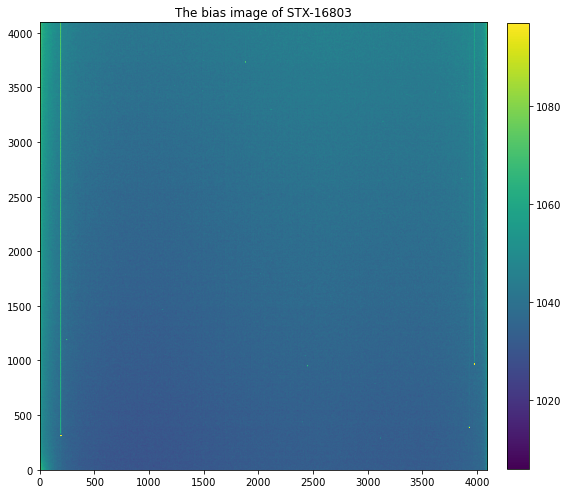

In [26]:
hdul = fits.open(bias_fits[0])

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = yvu.zimshow(axs, hdul[0].data)
axs.set_title('The bias image of STX-16803')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()

C:\Users\Kiehyun\AppData\Local\Temp/ipykernel_20188/3250914954.py:16: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im1, fraction=0.0455, pad=0.04)


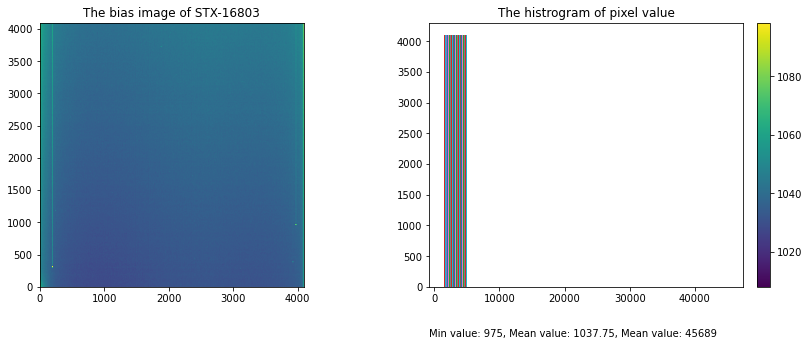

In [27]:
hdul = fits.open(bias_fits[12])

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = yvu.zimshow(axs[0], hdul[0].data)
im2 = axs[1].hist(hdul[0].data 
                    #histtype='step',
                    #50 
                    )

axs[0].set_title('The bias image of STX-16803')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

### DARK

In [28]:
dark_fits = summary.loc[summary["IMAGETYP"] == "DARK"].copy()
dark_fits.reset_index(inplace=True)
dark_fits = dark_fits["file"]
print(type(dark_fits))
print(len(dark_fits))
print(dark_fits)

<class 'pandas.core.series.Series'>
20
0     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
1     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
2     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
3     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
4     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
5     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
6     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
7     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
8     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
9     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
10    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
11    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
12    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
13    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
14    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
15    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
16    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
17    R:\

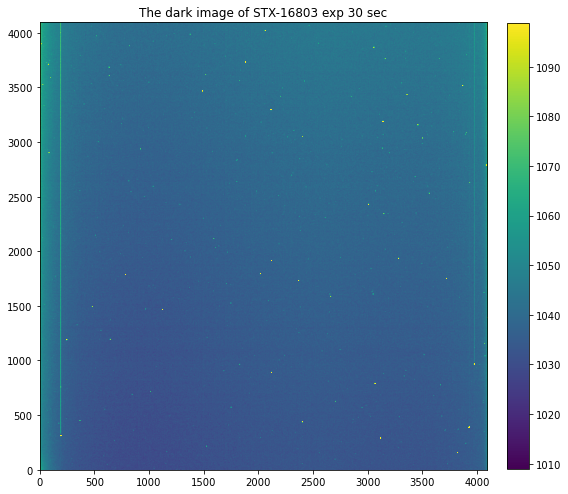

In [29]:
hdul = fits.open(dark_fits[5])

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = yvu.zimshow(axs, hdul[0].data)
axs.set_title('The dark image of STX-16803 exp 30 sec')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()

C:\Users\Kiehyun\AppData\Local\Temp/ipykernel_20188/427932723.py:16: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im1, fraction=0.0455, pad=0.04)


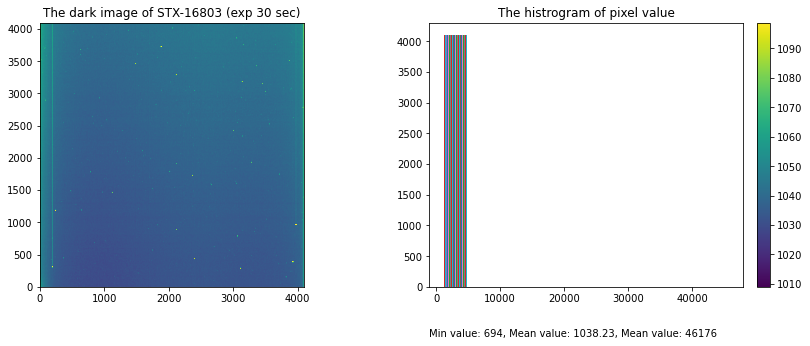

In [30]:
hdul = fits.open(dark_fits[5])

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = yvu.zimshow(axs[0], hdul[0].data)
im2 = axs[1].hist(hdul[0].data 
                    #histtype='step',
                    #50 
                    )

axs[0].set_title('The dark image of STX-16803 (exp 30 sec)')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

## Flat

In [31]:
flat_fits = summary.loc[summary["IMAGETYP"] == "FLAT"].copy()
flat_fits.reset_index(inplace=True)
flat_fits = flat_fits["file"]
print(type(flat_fits))
print(len(flat_fits))
print(flat_fits)

<class 'pandas.core.series.Series'>
18
0     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
1     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
2     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
3     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
4     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
5     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
6     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
7     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
8     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
9     R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
10    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
11    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
12    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
13    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
14    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
15    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
16    R:\CCD_obs\RiLA600_2022\BARNARD174_Light_-_202...
17    R:\

In [12]:
fpath = Path(summary['file'][1])
print(fpath)
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = yvu.zimshow(axs, hdul[0].data)
#axs.set_title('The flat image of STX-16803')
#axs.set_title('The Dark image of 180 sec')
axs.set_title('The Dark image of 270 sec')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()

/home/guitar79/Downloads/images/-_Dark_-_2022-11-12-14-46-31_270sec_RiLA600_STX-16803_-20C_2bin.fit


/home/guitar79/Downloads/images/-_Bias_-_2022-11-15-12-02-09_000sec_RiLA600_STX-16803_-20C_2bin.fit


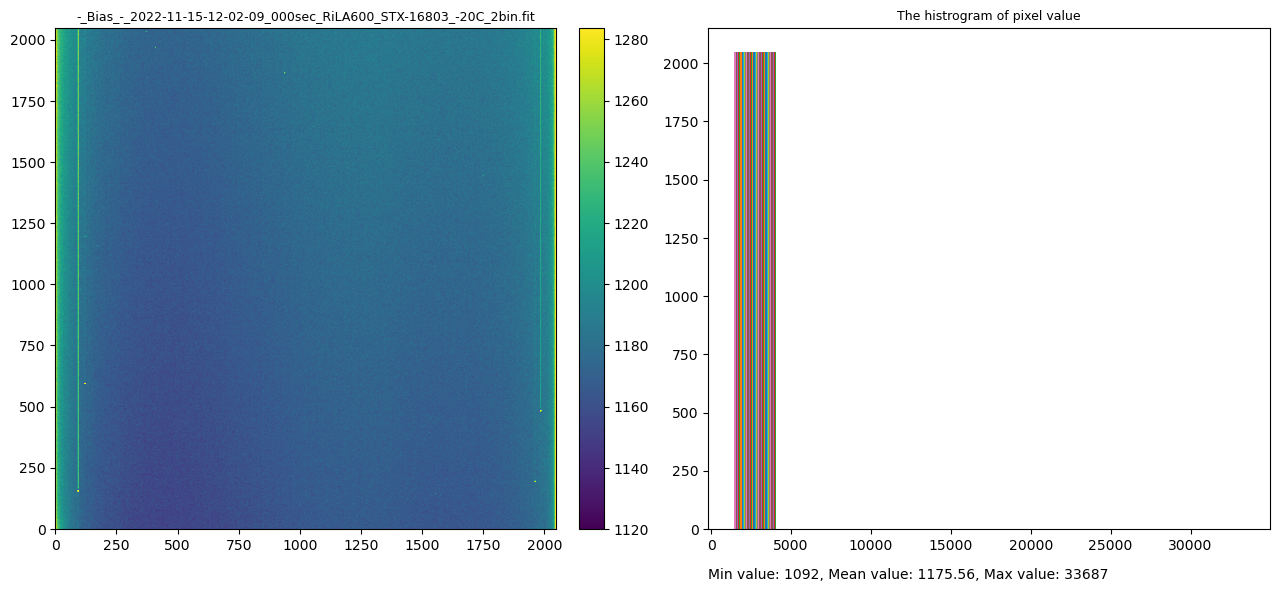

In [27]:
fpath = Path(summary['file'][0])
print(fpath)
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = yvu.zimshow(axs[0], hdul[0].data)

im2 = axs[1].hist(hdul[0].data, 
                    # 50, 
                    # histtype='step',
                    )

axs[0].set_title(f'{fpath.name}', fontsize=9)
axs[1].set_title('The histrogram of pixel value', fontsize=9)

plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", 
             xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=1.0)

/home/guitar79/Downloads/images/-_Dark_-_2022-11-12-14-46-31_270sec_RiLA600_STX-16803_-20C_2bin.fit


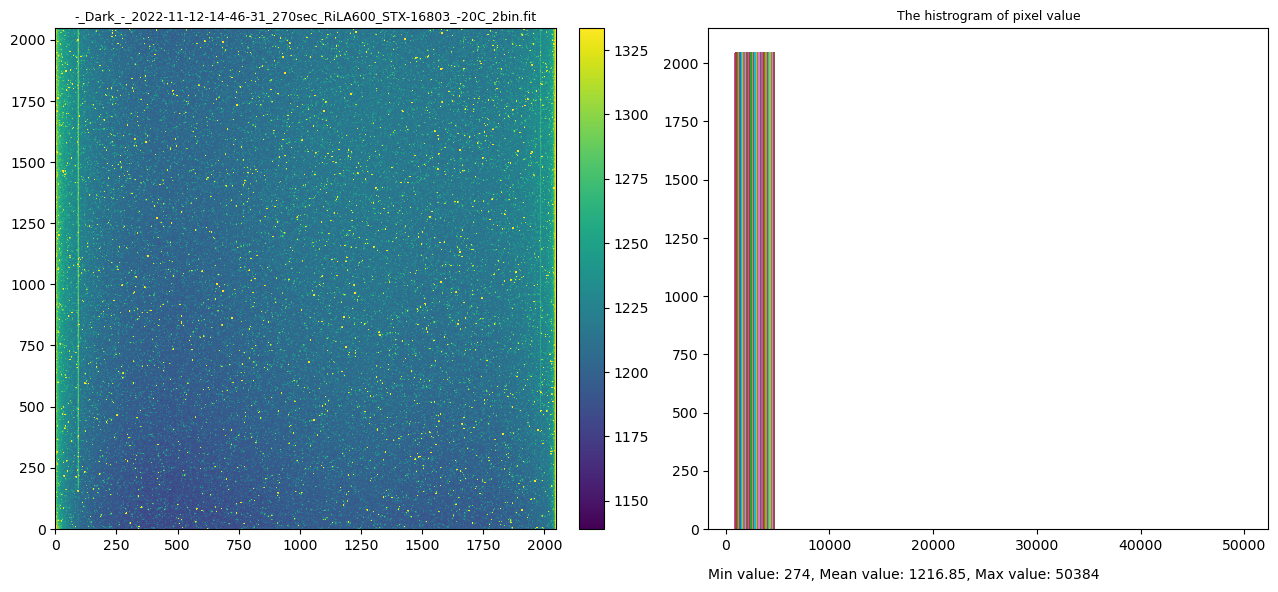

In [20]:
fpath = Path(summary['file'][1])
print(fpath)
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = yvu.zimshow(axs[0], hdul[0].data)

im2 = axs[1].hist(hdul[0].data, 
                    # 50, 
                    # histtype='step',
                    )

axs[0].set_title(f'{fpath.name}', fontsize=9)
axs[1].set_title('The histrogram of pixel value', fontsize=9)

plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", 
             xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=1.0)

/home/guitar79/Downloads/images/-_Flat_R_2022-11-02-08-47-58_000sec_RiLA600_STX-16803_-24C_2bin.fit


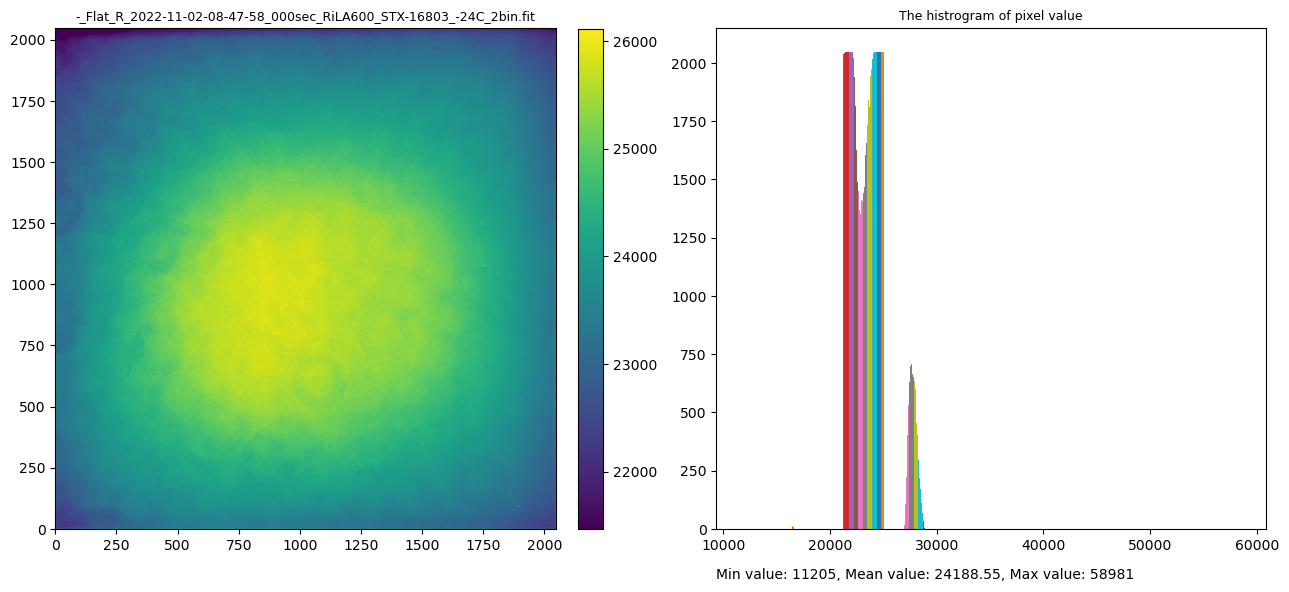

In [24]:
fpath = Path(summary['file'][2])
print(fpath)
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = yvu.zimshow(axs[0], hdul[0].data)

im2 = axs[1].hist(hdul[0].data, 
                    # 50, 
                    # histtype='step',
                    )

axs[0].set_title(f'{fpath.name}', fontsize=9)
axs[1].set_title('The histrogram of pixel value', fontsize=9)

plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", 
             xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=1.0)

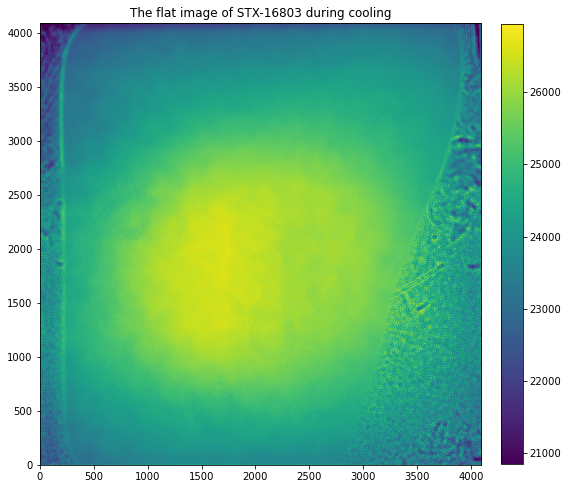

In [34]:
hdul = fits.open(flat_fits[10])

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = yvu.zimshow(axs, hdul[0].data)
axs.set_title('The flat image of STX-16803 during cooling')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()

## Flat image

skyflat image

C:\Users\Kiehyun\AppData\Local\Temp/ipykernel_20188/1132229479.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im1, fraction=0.0455, pad=0.04)


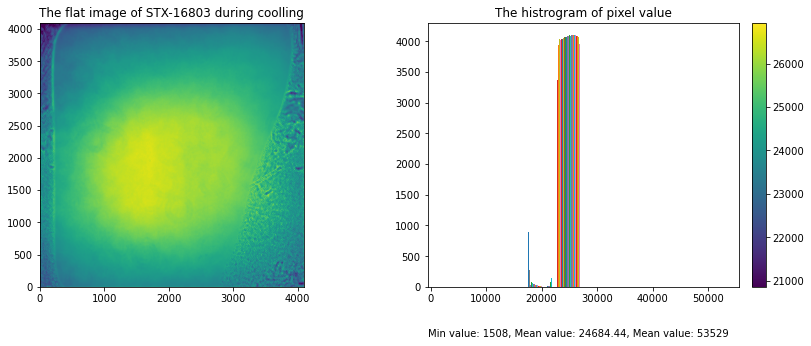

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = yvu.zimshow(axs[0], hdul[0].data)
im2 = axs[1].hist(hdul[0].data 
                    #histtype='step',
                    #50 
                    )

axs[0].set_title('The flat image of STX-16803 during coolling')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)